# Quantum - Satisfiability and Grover's Algorithm

In [1]:
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle
from qiskit import Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute

/usr/local/lib/python3.8/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


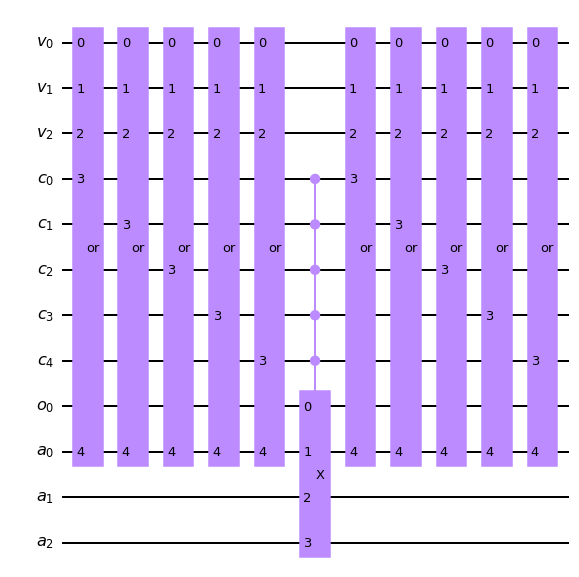

In [2]:
input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

oracle = LogicalExpressionOracle(input_3sat)
oracle.construct_circuit()
orc = oracle.circuit
orc.draw('mpl')

In [3]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # do multi-controlled-z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1) # multi-controlled toffoli
    qc.h(nqubits-1)
    # apply trnasformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # apply trnasformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # we will return diffuser as a gate 
    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s
    

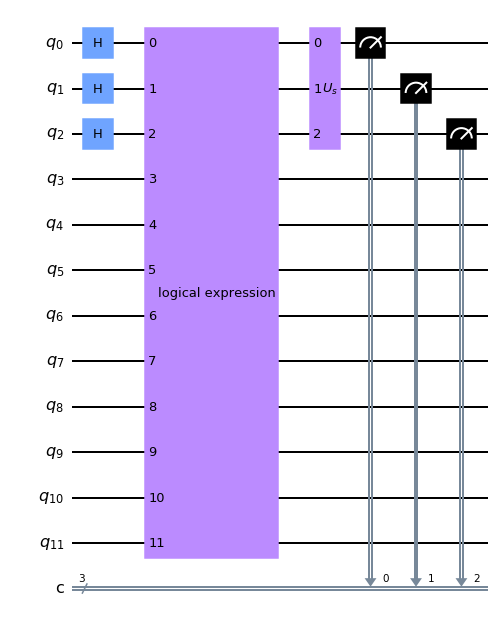

In [4]:
qc = QuantumCircuit(12,3)
oracle_gate = orc.to_gate()
oracle_gate.name = 'logical expression'
qc = initialize_s(qc, [0, 1, 2])
qc.append(oracle_gate, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
qc.append(diffuser(3), [0, 1, 2])
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')

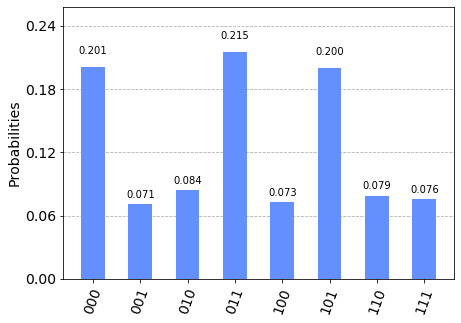

In [5]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

## Laboratory Activity 

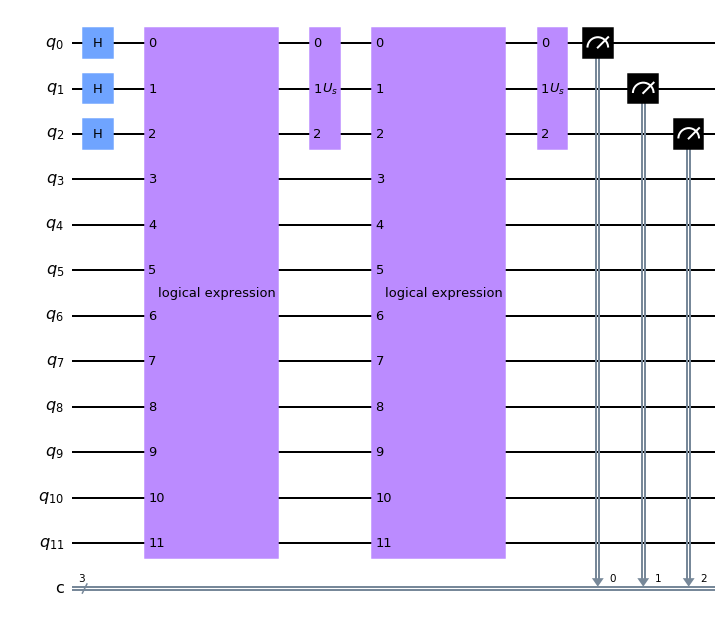

In [6]:
qc = QuantumCircuit(12,3)
oracle_gate = orc.to_gate()
oracle_gate.name = 'logical expression'
qc = initialize_s(qc, [0, 1, 2])
qc.append(oracle_gate, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
qc.append(diffuser(3), [0, 1, 2])
qc.append(oracle_gate, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
qc.append(diffuser(3), [0, 1, 2])
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')

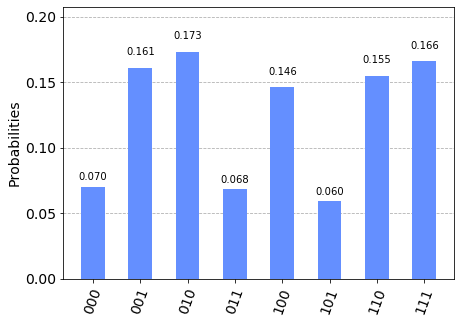

In [7]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

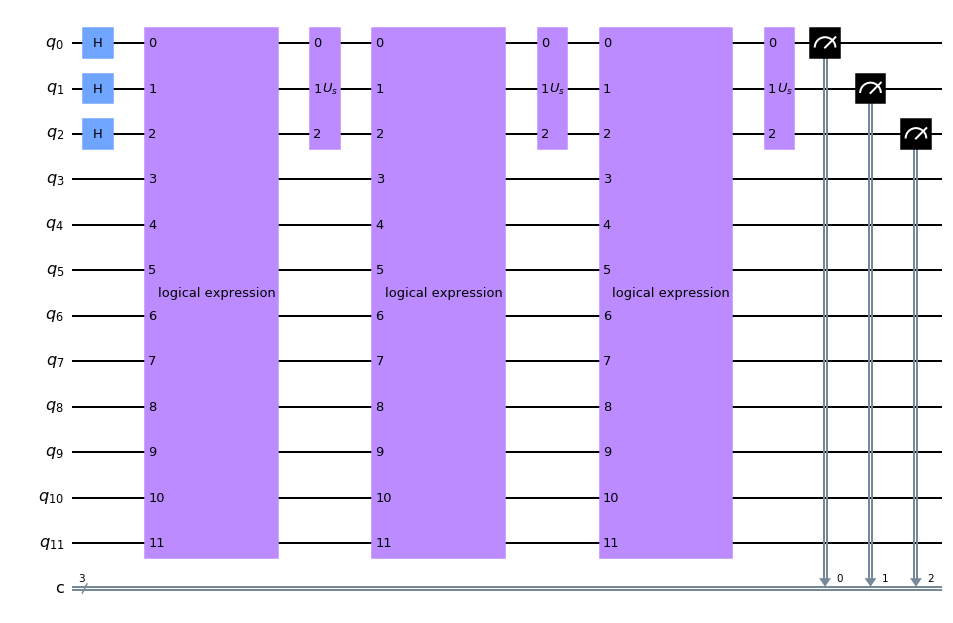

In [8]:
qc = QuantumCircuit(12,3)
oracle_gate = orc.to_gate()
oracle_gate.name = 'logical expression'
qc = initialize_s(qc, [0, 1, 2])
qc.append(oracle_gate, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
qc.append(diffuser(3), [0, 1, 2])
qc.append(oracle_gate, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
qc.append(diffuser(3), [0, 1, 2])
qc.append(oracle_gate, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
qc.append(diffuser(3), [0, 1, 2])
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')

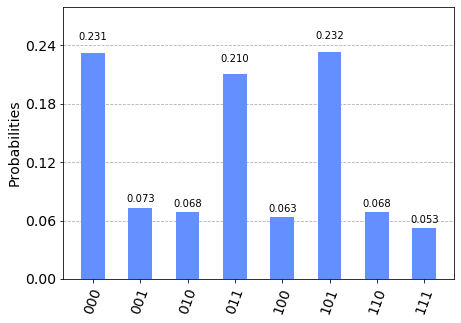

In [9]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

What happends when I did more Iterations?
It went higher. Its still with in sqrt(N) iterations for Grover's algorithm. 

What do I observe from this experiment? 
Grover's Algorithm is unique. High accuracy seems harder to actieve.